In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from collections import namedtuple
from sklearn.neighbors import KernelDensity
from numpy import exp
%matplotlib Notebook

In [2]:
r2 = lambda x:round(x,2)
r3 = lambda x:round(x,3)

In [3]:
# sns.set_style("whitegrid")

In [4]:
tipsDF = pd.read_excel(r"tips.xlsx"
                      ,usecols="A:G")

In [5]:
tipsDF.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
tipsDF.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


<IPython.core.display.Javascript object>


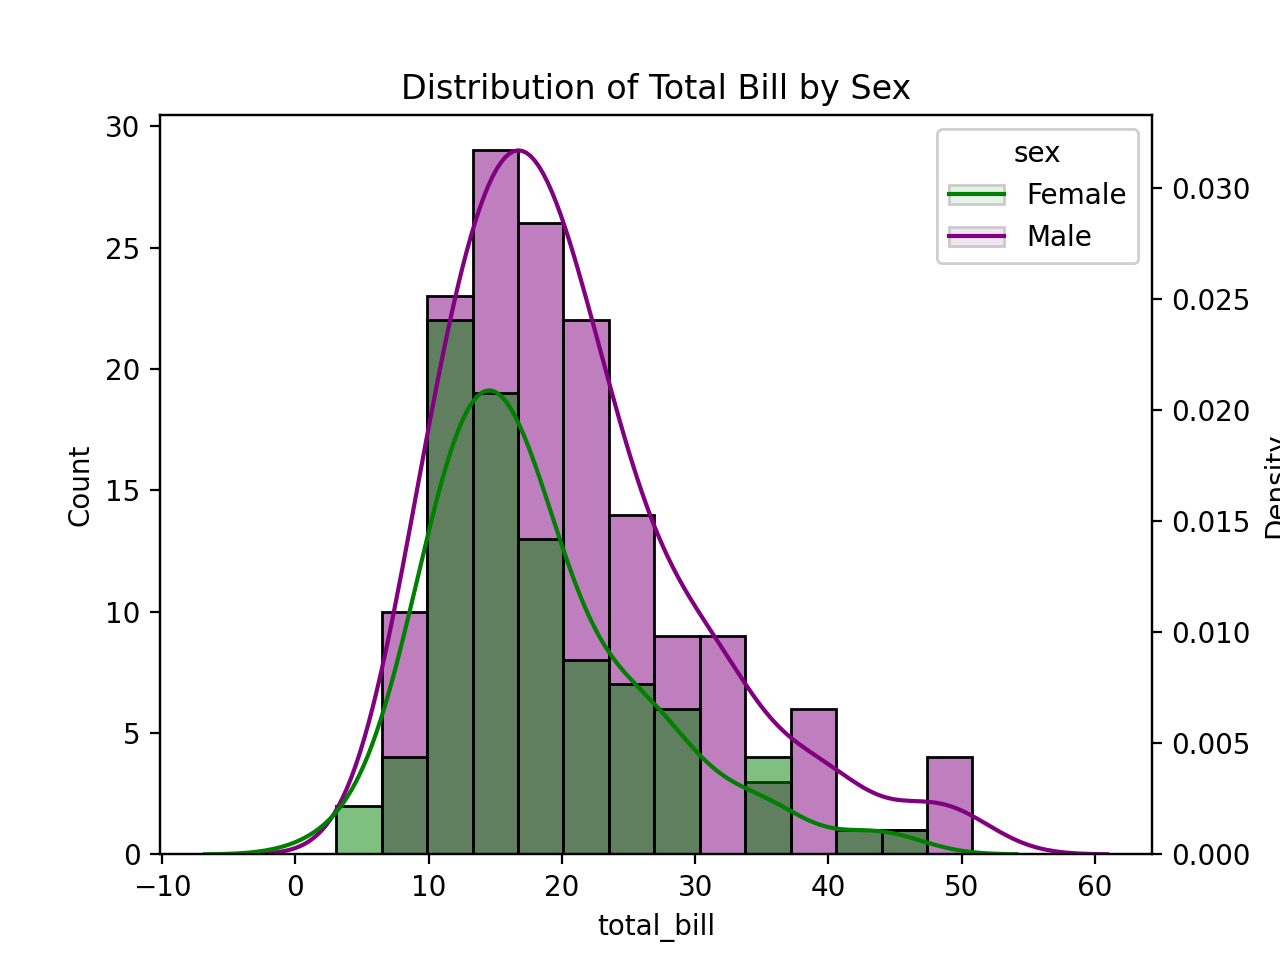

In [7]:
fig, ax = plt.subplots()
sns.histplot(data=tipsDF, x="total_bill", hue="sex", palette=["green","purple"])
ax2 = ax.twinx()
sns.kdeplot(data=tipsDF, x="total_bill", hue="sex", palette=["green","purple"],ax=ax2)
plt.title("Distribution of Total Bill by Sex")
plt.show()

In [8]:
stats.skew(tipsDF.total_bill)

1.1262346334818638

<IPython.core.display.Javascript object>


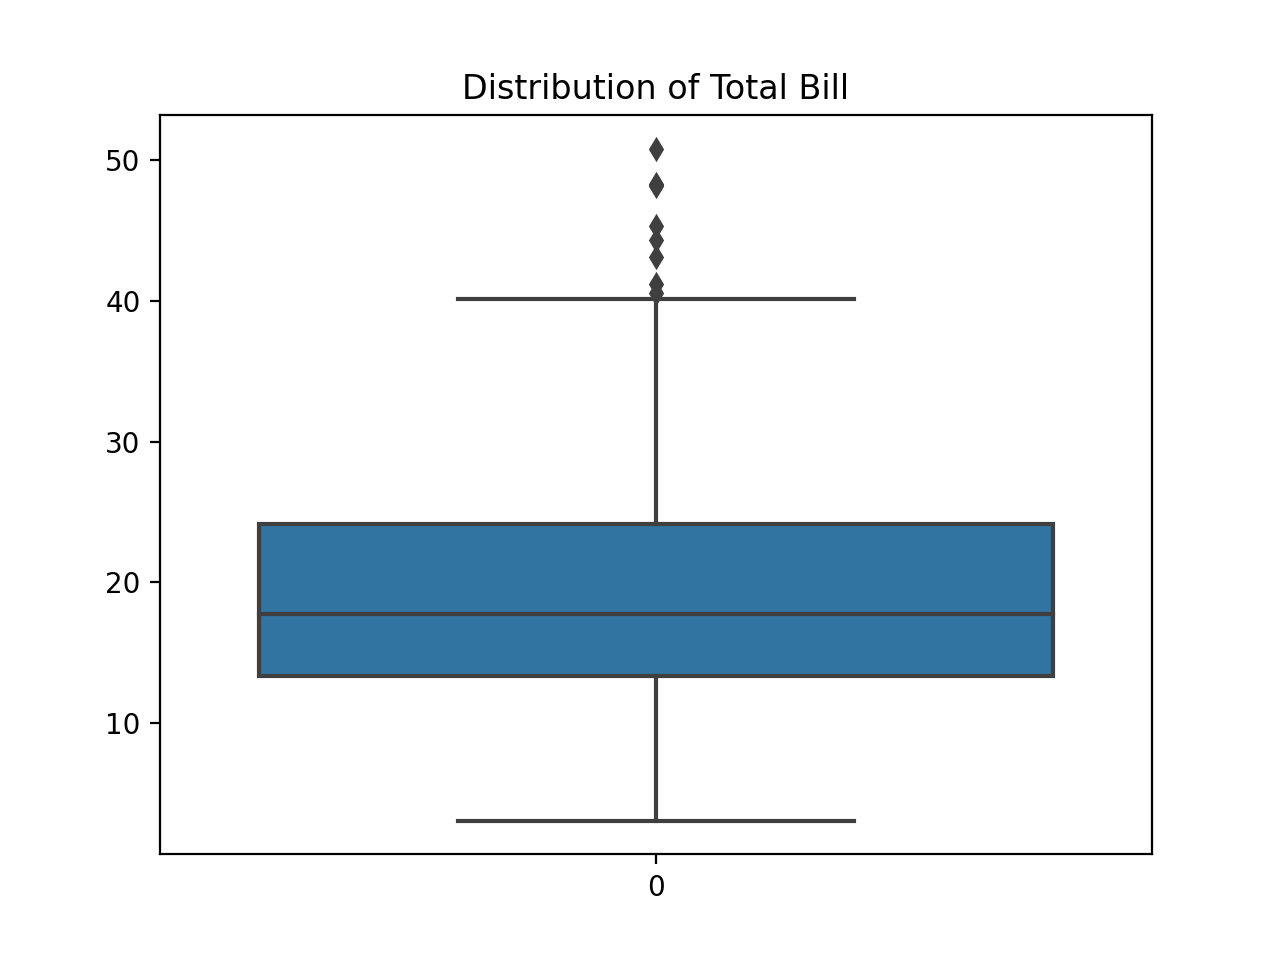

In [9]:
plt.figure()
sns.boxplot(data = tipsDF.total_bill)
plt.title("Distribution of Total Bill")
plt.show()

# Exercise 1

1. Test the relationship between the time of day (lunch or dinner) and the total bill:
- What are your statistical hypotheses?

     - H0: mu1 = mu2 or mu1 + mu2 = 0
     - Ha: mu1 != mu2 or mu1 + mu2 != 0
     
- Are your results statistically significant? What evidence does this lend to your hypotheses?

    - Yes the results are statistically significant
    - We reject the null hypothesis H0 and prove or research hypothesis Ha that there is a diffrence in the total bill depending on if its lunch or dinner
    
- What is the estimated effect size?

    - The estimated effect magnitude or size is:
        - Low=1.34, High=5.92 with 95% confidence
        
2. Answer the same questions, but for the relationship between the time of day and the tip.

<IPython.core.display.Javascript object>


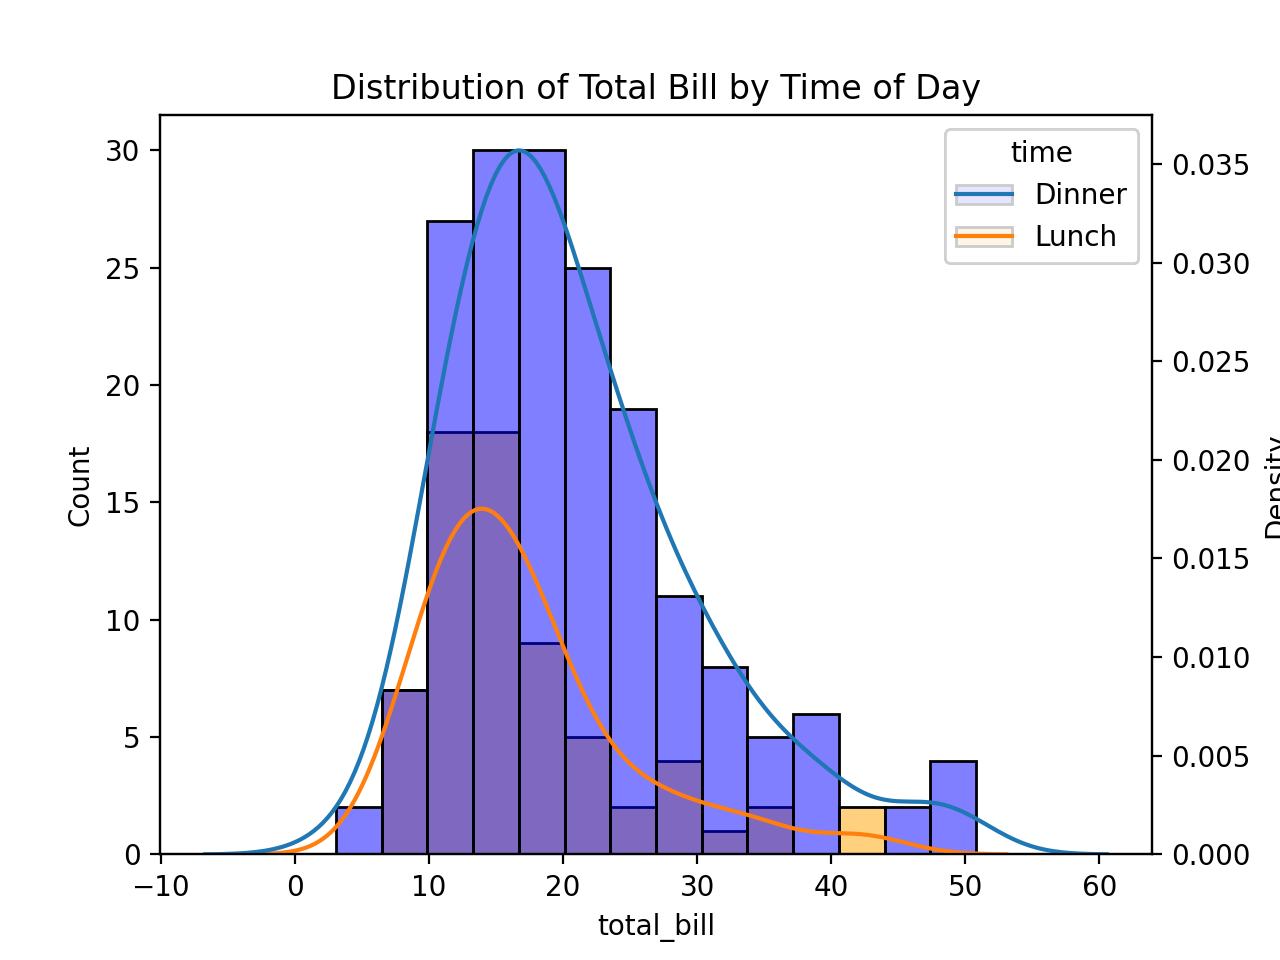

In [10]:
fig, ax = plt.subplots()
sns.histplot(data=tipsDF, x="total_bill", hue="time", palette=["blue", "orange"])
ax2 = ax.twinx()
sns.kdeplot(data=tipsDF,x="total_bill",hue="time")
plt.title("Distribution of Total Bill by Time of Day")
plt.show()

In [11]:
tipsDF.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [12]:
lunchData = tipsDF[tipsDF["time"]=="Lunch"][['total_bill', 'day', 'time']].reset_index(drop=True)
dinnerData = tipsDF[tipsDF["time"]=="Dinner"][['total_bill', 'day', 'time']].reset_index(drop=True)

In [13]:
alpha = 0.05
x1 = lunchData.total_bill.values
x2 = dinnerData.total_bill.values
n1 = len(x1)
n2 = len(x2)
x1_mean = r2(np.mean(x1))
x2_mean = r2(np.mean(x2))
x1_var = r2(np.var(x1,ddof=1))
x2_var = r2(np.var(x2,ddof=1))
pe = abs(r2(x1_mean - x2_mean))
se = r2(np.sqrt(r2(x1_var / n1) + r2(x2_var / n2)))
dfNom = ((x1_var / n1) + (x2_var / n2)) ** 2
dfDen = (((x1_var/n1)**2) / (n1 -1)) + (((x2_var/n2)**2) / (n2 -1))
df = round(dfNom / dfDen)
tCrit = r3(stats.t.ppf(1 - alpha / 2, df=df))
Tscore = r2(abs(pe/se))
pvalue = r3(stats.t.sf(r2(abs(pe/se)),df=df))
cirange = namedtuple("ConfidenceInterval95",
                     ["Low","High"])(r2(pe - tCrit * se),r2(pe + tCrit * se))

<img src="https://i.stack.imgur.com/e7V5e.png![image.png](attachment:image.png)">

In [14]:
alpha

0.05

In [15]:
pe

3.63

In [16]:
Tscore

3.13

In [17]:
tCrit

1.977

In [18]:
cirange

ConfidenceInterval95(Low=1.34, High=5.92)

In [19]:
pvalue

0.001

In [20]:
pvalue < alpha

True

# Excercise 2

1. Test the relationship between the time of day (lunch or dinner) and the tip:

• What are your statistical hypotheses?

    - There is a difference in tips based on time of day
    - H0: Mu1 = Mu2 or H0: Mu1 + Mu2 = 0
    - Ha: Mu1 != Mu2 or Ha: Mu1 - Mu2 != 0
    - Testing at a level of significance of: 0.05

• Are your results statistically significant? What evidence does this lend to your hypotheses?

    - With a pvalue of: 0.021 with an alpha of: 0.05 or results are statistically significant by definition
    - With a rejection of the null hypothesis H0 we can state that with 95% confidence there is a difference in the mean prices of tips by time of day

• What is the estimated effect size?

    - The estimated effect size is (0.01, 0.73)

In [21]:
tipsDF.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [22]:
lunchTipsDF = tipsDF[tipsDF["time"]=="Lunch"][['tip', 'day', 'time']].reset_index(drop=True)
dinnerTipsDF = tipsDF[tipsDF["time"]=="Dinner"][['tip', 'day', 'time']].reset_index(drop=True)

In [23]:
( 
     lunchTipsDF.describe()
    .reset_index()
    .merge(
             dinnerTipsDF.describe()
            .reset_index()
            ,on="index"
        )
)[["index","tip_x","tip_y"]].rename(columns={"tip_x":"Lunch tip"
                                            ,"tip_y":"Dinner tip"
                                            ,"index":"Summary Stats"}).iloc[1:,:]

,Summary Stats,Lunch tip,Dinner tip
1,mean,2.728088,3.102670
2,std,1.205345,1.436243
3,min,1.250000,1.000000
4,25%,2.000000,2.000000
5,50%,2.250000,3.000000
6,75%,3.287500,3.687500
7,max,6.700000,10.000000


<IPython.core.display.Javascript object>


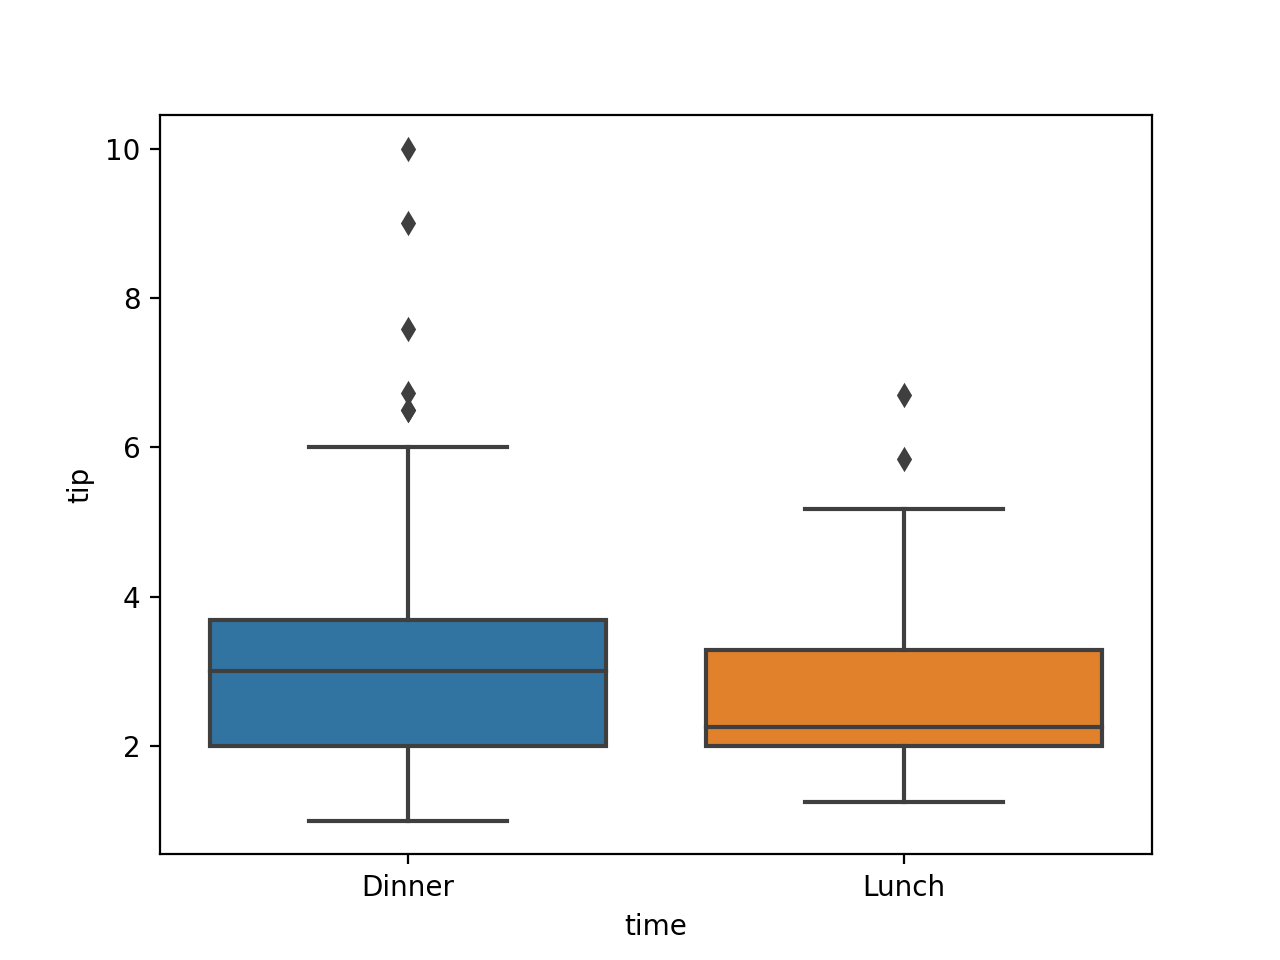

In [24]:
plt.figure()
sns.boxplot(data = tipsDF,y="tip" ,x="time")
plt.show()

<IPython.core.display.Javascript object>


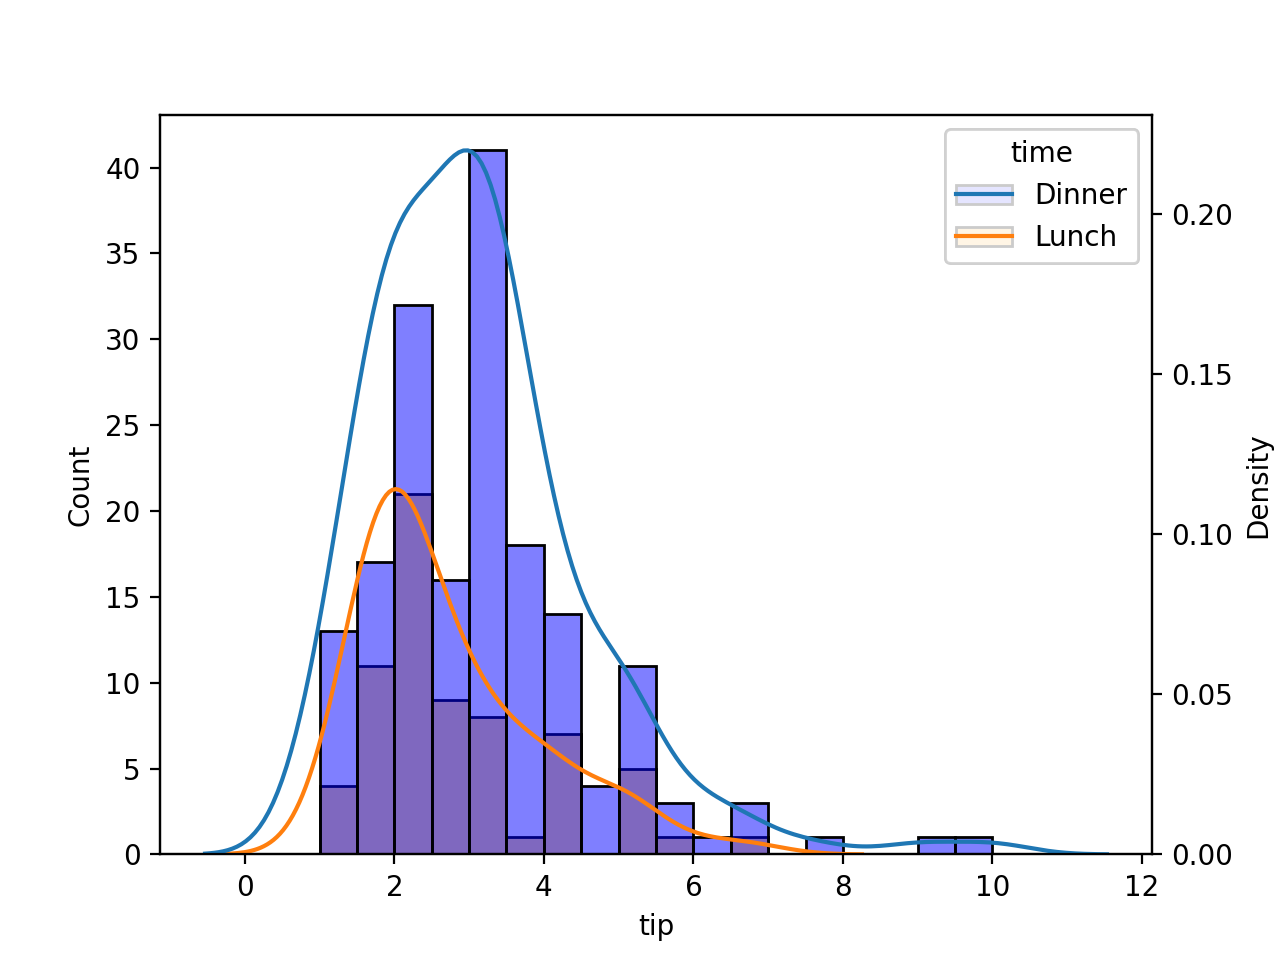

In [25]:
fig, ax = plt.subplots()
sns.histplot(data=tipsDF, x="tip", hue="time", palette=["blue", "orange"])
ax2 = ax.twinx()
sns.kdeplot(data=tipsDF, x="tip", hue="time",ax=ax2)
plt.show()

In [26]:
print("Skew Lunch tips: {}".format(r2(stats.skew(lunchTipsDF.tip)))
     +"\n"
     +"Skew Dinner tips: {}".format(r2(stats.skew(dinnerTipsDF.tip))))

Skew Lunch tips: 1.21
Skew Dinner tips: 1.47


In [27]:
alpha = 0.05
n1 = len(lunchTipsDF)
n2 = len(dinnerTipsDF)
x1 = lunchTipsDF.tip
x2 = dinnerTipsDF.tip
x1_mean = r2(np.mean(x1))
x2_mean = r2(np.mean(x2))
pe = abs(r2(x1_mean - x2_mean))
x1_var = r2(np.var(x1))
x2_var = r2(np.var(x2))
df = round(
    (((x1_var / n1) + (x2_var / n2)) ** 2) 
  / 
    (((x1_var / n1) ** 2 / (n1-1))
   + ((x2_var / n2) ** 2 / (n2-1)))
)
Tscore = abs(r3(pe / se))
pvalue = r3(stats.t.sf(Tscore,df=df))
tCrit = r3(stats.t.ppf(1-alpha/2,df=df))
se = r3(np.sqrt((x1_var / n1) + (x2_var / n2)))
me = r3(tCrit * se)
ciRange = (r2(pe - me), r2(pe + me))

In [28]:
tCrit

1.976

In [29]:
Tscore

0.319

In [30]:
se

0.181

In [31]:
me

0.358

In [32]:
pvalue

0.375

In [33]:
ciRange

(0.01, 0.73)

In [34]:
pvalue < alpha

False

In [35]:
Tscore > tCrit

False